# Louis Vuitton Stock Analysis

## Introduction

Ce projet porte sur l'analyse des prix du cours de la bourse de l'entreprise Louis Vuitton.
Pour ce faire, je vais utiliser certaines librairies de Python utiles à l'analyse de données et de visualisation graphiques.
J'en profite pour en apprendre un peu plus sur la finance et l'entreprise de Louis Vuitton en général !

### Questions

- Quel changement a subi le prix d'une action au fil du temps ?
- Quel est le rendement moyen d'une action par jour ?
- Quelle est la corrélation entre le rendement moyen quotidien et l'action ?
- Est-il risqué d'investir dans une action ?

### Importation du fichier

Pour ce fichier trouvé sur kaggle.com, Je vais l'importer plutôt que de le télécharger pour m'entrainer et gagner du temps !

In [3]:
import kagglehub
path = kagglehub.dataset_download("prasertk/louis-vuitton-daily-stock-prices-20002022")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\namdn\.cache\kagglehub\datasets\prasertk\louis-vuitton-daily-stock-prices-20002022\versions\1


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
files = os.listdir(path)
print("Fichiers dans le dataset :", files)

Fichiers dans le dataset : ['Louis Vuitton stocks 2000-2022.csv']


In [16]:
csv_file = os.path.join(path, 'Louis Vuitton stocks 2000-2022.csv')

df = pd.read_csv(csv_file)
print(df.head())


         Date Symbol  Adj Close      Close       High        Low       Open  \
0  2000-01-03  MOH.F  66.007896  88.800003  92.599998  88.800003  91.400002   
1  2000-01-04  MOH.F  60.209904  81.000000  88.400002  81.000000  88.400002   
2  2000-01-05  MOH.F  57.385220  77.199997  78.599998  76.000000  77.000000   
3  2000-01-06  MOH.F  56.195900  75.599998  77.000000  75.599998  76.000000   
4  2000-01-07  MOH.F  57.682568  77.599998  77.599998  74.800003  77.000000   

    Volume  
0   3000.0  
1  10500.0  
2  12000.0  
3   2500.0  
4   7000.0  


### Aperçu du fichier

In [17]:
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2000-01-03,MOH.F,66.007896,88.800003,92.599998,88.800003,91.400002,3000.0
1,2000-01-04,MOH.F,60.209904,81.000000,88.400002,81.000000,88.400002,10500.0
2,2000-01-05,MOH.F,57.385220,77.199997,78.599998,76.000000,77.000000,12000.0
3,2000-01-06,MOH.F,56.195900,75.599998,77.000000,75.599998,76.000000,2500.0
4,2000-01-07,MOH.F,57.682568,77.599998,77.599998,74.800003,77.000000,7000.0
...,...,...,...,...,...,...,...,...
5644,2022-02-03,MOH.F,713.500000,713.500000,730.700012,711.900024,729.000000,313.0
5645,2022-02-04,MOH.F,710.900024,710.900024,715.799988,699.900024,711.900024,322.0
5646,2022-02-07,MOH.F,717.299988,717.299988,718.299988,704.000000,708.000000,562.0
5647,2022-02-08,MOH.F,709.700012,709.700012,722.200012,704.400024,721.200012,297.0


Quelques définitions
- Open: Prix d'ouverture pour la journée
- High: Prix le plus élevé atteint 
- Low: Prix le plus bas atteint
- Close: Dernier prix pour la journée
- Volume: Nombre total d'actions échangées
- Adj Close: Prix de clôture ajusté

L'ordre des colonnes ne me plaît pas donc je définis un nouvel ordre :

In [23]:
nouvel_ordre = ['Date', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Adj Close', 'Volume']
df = df[nouvel_ordre]
df

,Date,Symbol,High,Low,Open,Close,Adj Close,Volume
0,2000-01-03,MOH.F,92.599998,88.800003,91.400002,88.800003,66.007896,3000.0
1,2000-01-04,MOH.F,88.400002,81.000000,88.400002,81.000000,60.209904,10500.0
2,2000-01-05,MOH.F,78.599998,76.000000,77.000000,77.199997,57.385220,12000.0
3,2000-01-06,MOH.F,77.000000,75.599998,76.000000,75.599998,56.195900,2500.0
4,2000-01-07,MOH.F,77.599998,74.800003,77.000000,77.599998,57.682568,7000.0
...,...,...,...,...,...,...,...,...
5644,2022-02-03,MOH.F,730.700012,711.900024,729.000000,713.500000,713.500000,313.0
5645,2022-02-04,MOH.F,715.799988,699.900024,711.900024,710.900024,710.900024,322.0
5646,2022-02-07,MOH.F,718.299988,704.000000,708.000000,717.299988,717.299988,562.0
5647,2022-02-08,MOH.F,722.200012,704.400024,721.200012,709.700012,709.700012,297.0


In [24]:
df.describe()

,High,Low,Open,Close,Adj Close,Volume
count,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000
mean,159.553776,156.647963,158.155338,158.216570,142.053188,1446.055231
std,148.216579,145.336917,147.032800,146.981609,149.909738,1768.501530
min,32.000000,28.299999,29.500000,29.000000,21.556625,0.000000
25%,67.000000,65.820000,66.349998,66.500000,49.803249,411.000000
50%,110.809998,108.339996,109.400002,109.849998,88.500412,895.000000
75%,166.250000,163.222000,164.638000,165.046997,146.567856,1784.000000
max,759.400024,742.900024,746.599976,749.799988,749.799988,22700.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5649 entries, 0 to 5648
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5649 non-null   object 
 1   Symbol     5649 non-null   object 
 2   High       5649 non-null   float64
 3   Low        5649 non-null   float64
 4   Open       5649 non-null   float64
 5   Close      5649 non-null   float64
 6   Adj Close  5649 non-null   float64
 7   Volume     5649 non-null   float64
dtypes: float64(6), object(2)
memory usage: 353.2+ KB


Il n'y a pas de valeurs oubliées ou nulles, on peut commencer à analyser notre fichier.

### Quel changement a subi le prix de l'action au fil du temps ?

<Axes: xlabel='Date'>

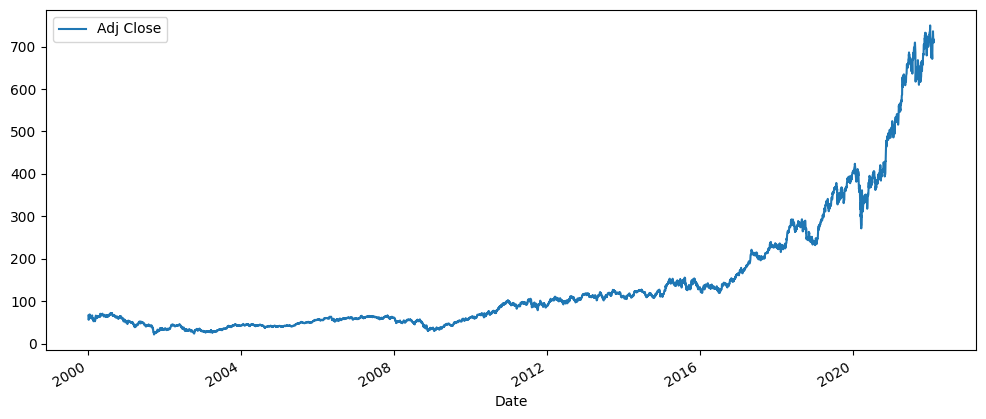

In [39]:
df['Adj Close'].plot(legend=True, figsize=(12,5))

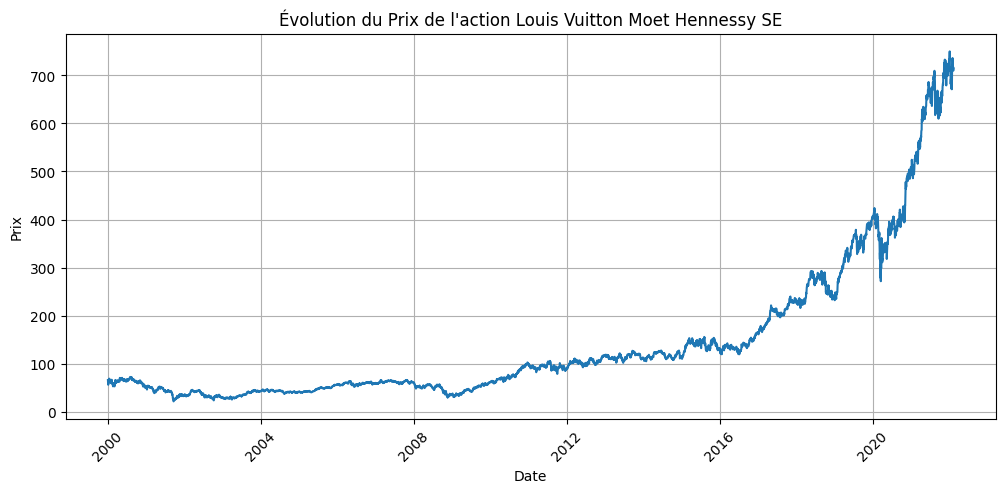

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(df['Adj Close'], label='Adj Close')
plt.title("Évolution du Prix de l'action Louis Vuitton Moet Hennessy SE")  
plt.xlabel('Date')  
plt.ylabel('Prix') 
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


<Axes: xlabel='Date'>

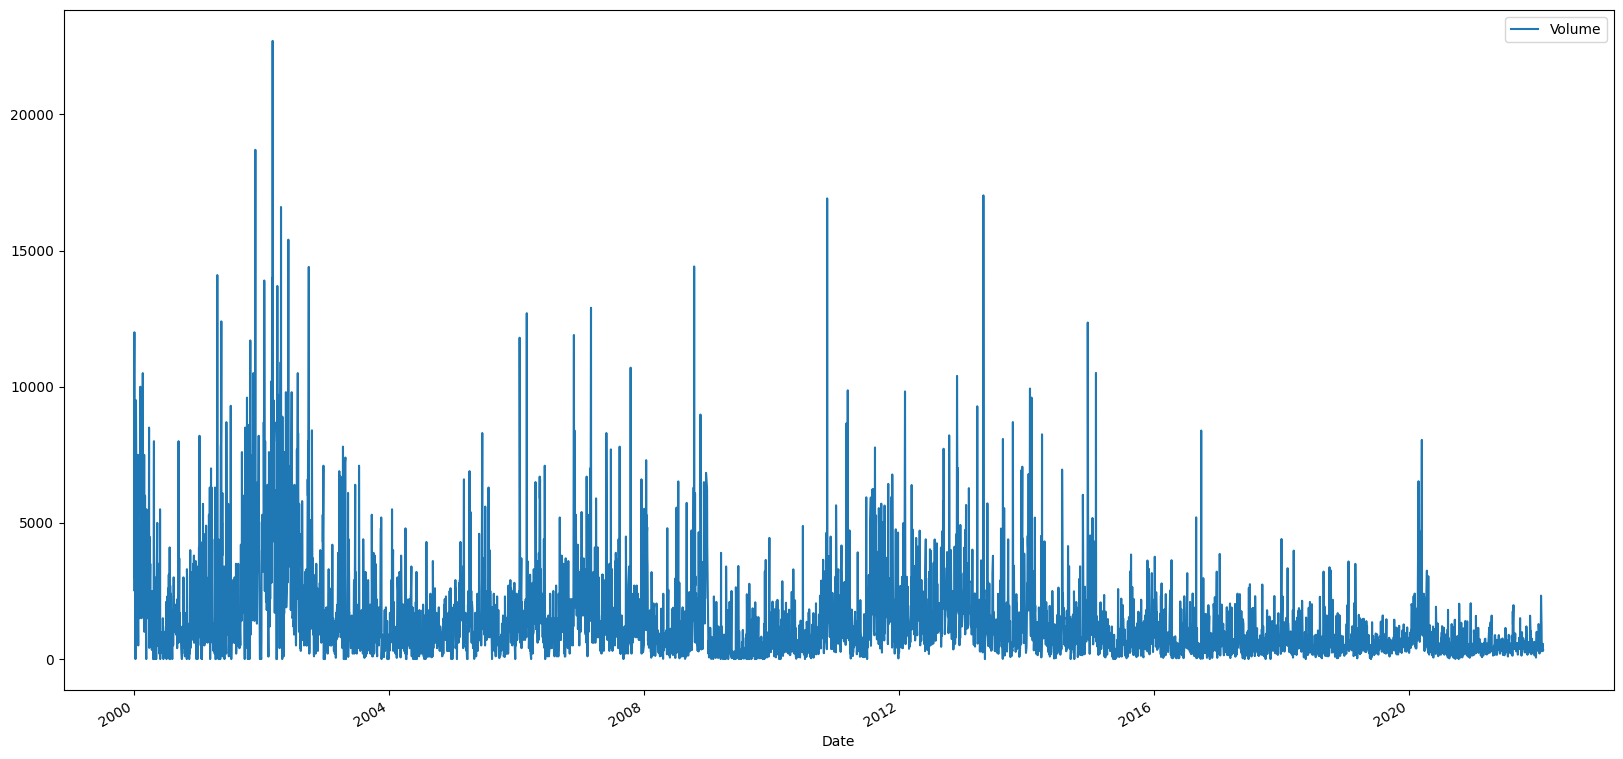

In [58]:
df['Volume'].plot(legend=True, figsize=(20,10))

Le nombre moyen d'actions échangées par jour depuis 2020.

In [59]:
df['Volume'].mean()

np.float64(1446.055231014339)

### Quel est le rendement moyen d'une action par jour ?

In [61]:
df['Rendement'] = df['Adj Close'].pct_change()

In [62]:
df['Rendement'].tail()

Date
2022-02-03   -0.020725
2022-02-04   -0.003644
2022-02-07    0.009003
2022-02-08   -0.010595
2022-02-09    0.006059
Name: Rendement, dtype: float64

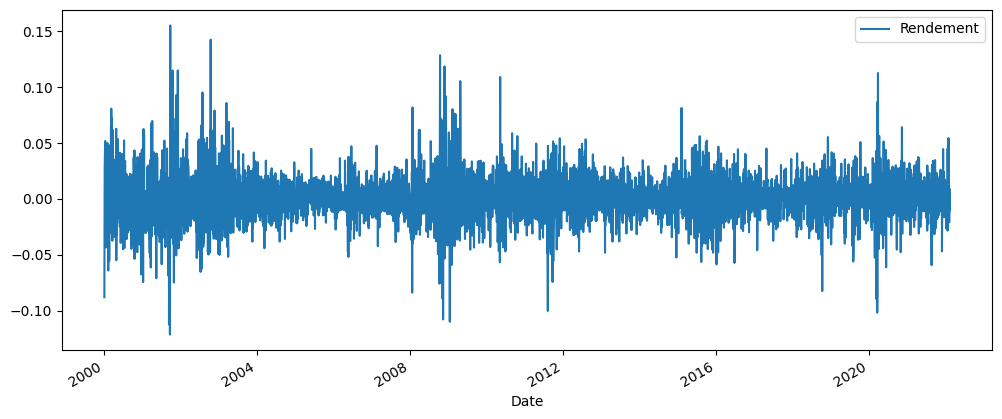

In [95]:
Rend = df['Rendement'].plot(legend=True,figsize=(12,5))

<Axes: xlabel='Rendement', ylabel='Count'>

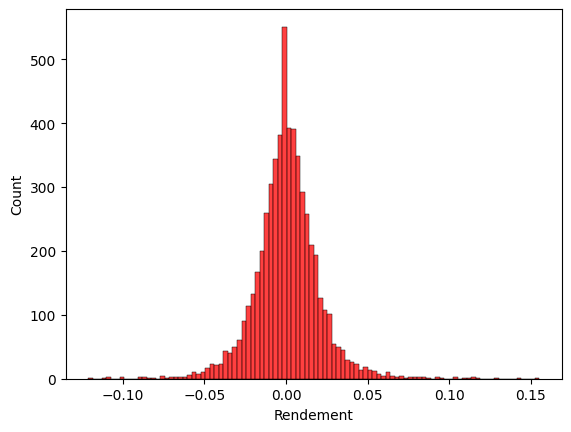

In [65]:
sns.histplot(x=df['Rendement'],bins=100,color='red')

Depuis la mise en place des actions de Louis Vuitton, les rendements quotidiens ont tendance à être plutôt négatif même si la différence
est très infime.

In [123]:
df2 = df.loc['2020-01-01':, 'Rendement']

<Axes: xlabel='Date'>

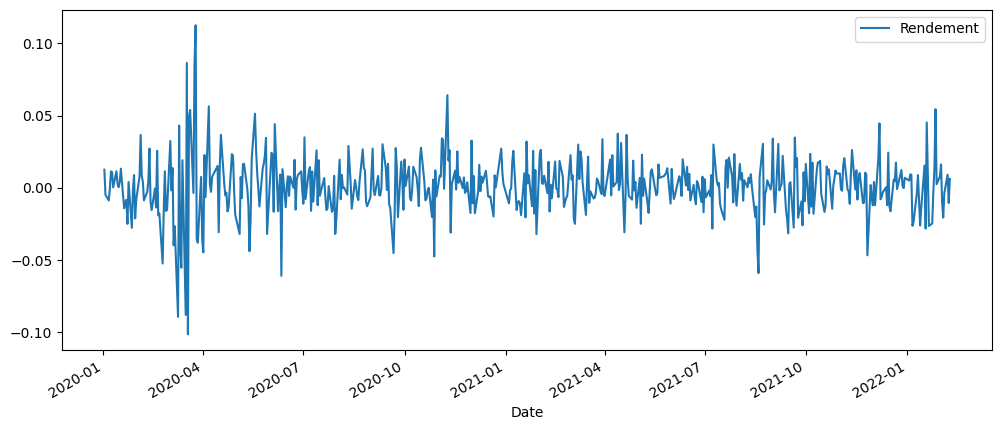

In [125]:
df.loc['2020-01-01':, 'Rendement'].plot(legend=True,figsize=(12,5))

<Axes: xlabel='Rendement', ylabel='Count'>

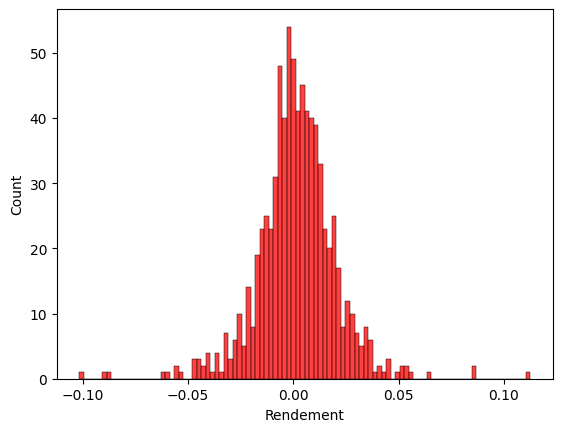

In [89]:
sns.histplot(x=df.loc['2019-01-01':, 'Rendement'],bins=100,color='red')

En faisant la même analyse sur la période 2019 à 2022, le rendement moyen quotidien est plus souvent positif comparé au rendement moyen quotidien depuis le début de l'ajout en bourse de Louis Vuitton.

### Quelle est la corrélation entre le rendement moyen quotidien et le prix de l'action ?

In [99]:
df

,Symbol,High,Low,Open,Close,Adj Close,Volume,Rendement
Date,,,,,,,,
2000-01-03,MOH.F,92.599998,88.800003,91.400002,88.800003,66.007896,3000.0,NaN
2000-01-04,MOH.F,88.400002,81.000000,88.400002,81.000000,60.209904,10500.0,-0.087838
2000-01-05,MOH.F,78.599998,76.000000,77.000000,77.199997,57.385220,12000.0,-0.046914
2000-01-06,MOH.F,77.000000,75.599998,76.000000,75.599998,56.195900,2500.0,-0.020725
2000-01-07,MOH.F,77.599998,74.800003,77.000000,77.599998,57.682568,7000.0,0.026455
...,...,...,...,...,...,...,...,...
2022-02-03,MOH.F,730.700012,711.900024,729.000000,713.500000,713.500000,313.0,-0.020725
2022-02-04,MOH.F,715.799988,699.900024,711.900024,710.900024,710.900024,322.0,-0.003644
2022-02-07,MOH.F,718.299988,704.000000,708.000000,717.299988,717.299988,562.0,0.009003


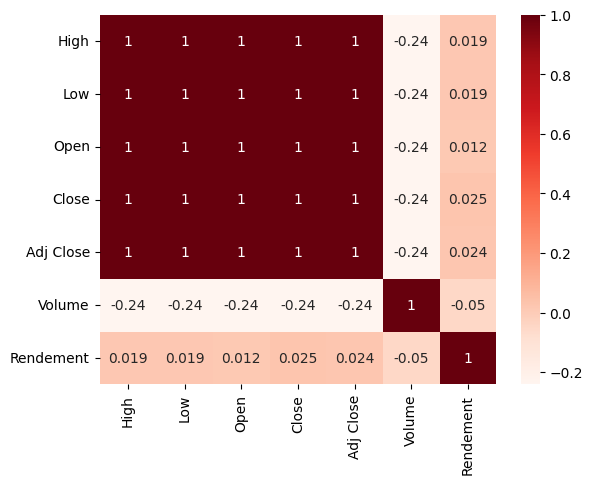

In [107]:
numeric_columns = df.select_dtypes(include= ['number']) 
sns.heatmap(numeric_columns.corr(),cmap = 'Reds', annot =True)
plt.show()

On remarque que la corrélation est de 0.024 ce qui est très insignifiant, il n'y a donc pas une grande corrélation entre ces deux variables.

### Est-il risqué d'investir dans une action ?

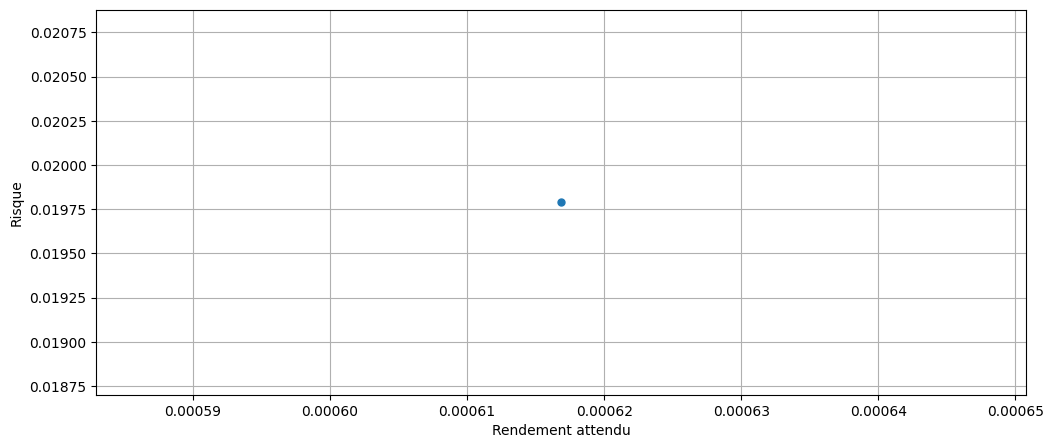

In [130]:
plt.figure(figsize=(12,5))

plt.scatter(df['Rendement'].mean(),df['Rendement'].std(),s=25)

plt.xlabel('Rendement attendu')
plt.ylabel('Risque')
plt.grid(True)

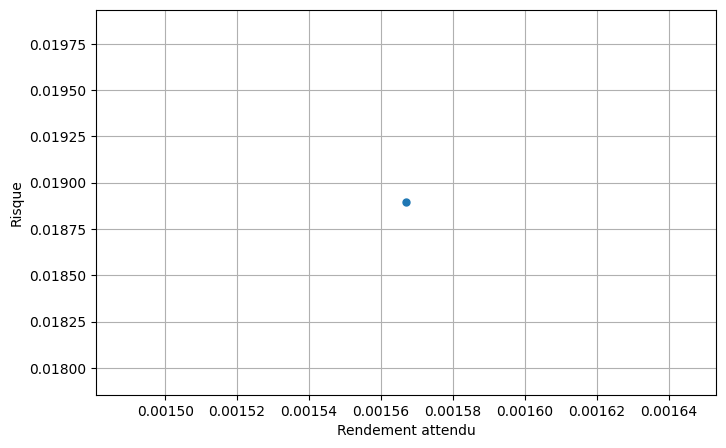

In [133]:
df_2022 = df['2019-01-01':'2022-12-31']

rendement_moyen = df_2022['Rendement'].mean()
risque = df_2022['Rendement'].std()

plt.figure(figsize=(8, 5))
plt.scatter(rendement_moyen, risque, s=25)
plt.xlabel('Rendement attendu')
plt.ylabel('Risque')
plt.grid(True)
plt.show()

Etant sur des valeurs très petites, le rendement attendu de 0.00062 ne nous permet pas de déterminer ou non s'il est risqué d'investir dans l'action. Nous sommes sur la période 2000 - 2022, on peut donc plutôt se référer aux 3 dernières années et on observe que le rendement est beaucoup élevé sur les 3 dernières années (0.001565 > 0.000615) que sur la totalité de l'action Louis Vuitton.
Un rendement peut être donc attendu et le risque étant assez bas (1.875% de risque) on peut donc prendre le risque d'investir.

De plus on peut utiliser la méthode de l'échantillonnage. On cherche la Value at Risk donc on utilisera un quantile empirique de 0.05 (soit 95% de confiance)

<Axes: xlabel='Rendement', ylabel='Count'>

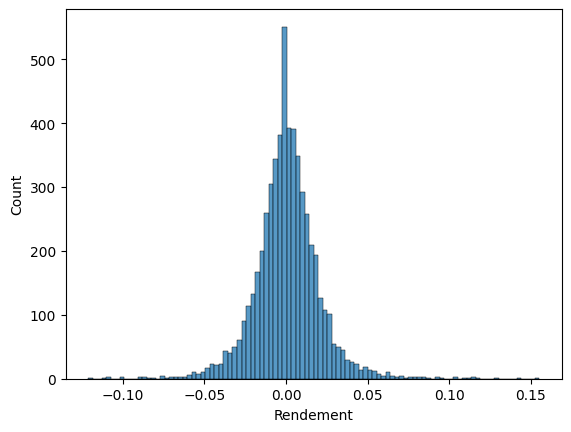

In [139]:
sns.histplot(x=df['Rendement'].dropna(),bins=100)

In [138]:
df['Rendement'].head()

Date
2000-01-03         NaN
2000-01-04   -0.087838
2000-01-05   -0.046914
2000-01-06   -0.020725
2000-01-07    0.026455
Name: Rendement, dtype: float64

In [135]:
df['Rendement'].quantile(0.05)

np.float64(-0.02987377430333316)

Notre quantile empirique 0.05 du rendement quotidien est donc à -0.03%. Cela signifique donc qu'avec 95% de confiance, la perte ne dépassera pas 3% de l'investissement.

### Conclusion

Le prix de l'action Louis Vuitton Moet Hennessy a beaucoup évolué depuis les années 2000. Sa valeur a été multipliée par 6 tandis que le nombre d'échanges réalisés au quotidien a énormément diminué.
Le rendement est également très faible mais est à la fois peu risqué. Sur un investissement réalisé, il y a 